<a href="https://colab.research.google.com/github/kajalDhun114/EDA-Project-onAirbnb-project/blob/main/mykajal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

####airnb is an online marketplace that connects people who want to rent out their homes with people looking for accomodations in that local.
###NYC is the most populus city in the US,and one of the most popular tourism and buisness places globally

In [1]:
#Import the main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#download the data set and read it as pandas data frame 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##importing airbnb csv file as df

In [4]:
# to load the dataset ,we will load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')

##Data profiling and data cleaning(lets getsummary of the dataset we have)

In [5]:
#lets see first five row of our dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#number of rowsand column in our dataset(rows,columns)


In [6]:
#number of rowsand column in our dataset(rows,columns)
df.shape

(48895, 16)

In [7]:
#lets extract the columns we have
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#get statistical information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

######here we saw that,we have 2 columns which have more than 10000 null values.
######having so many null values is not propriate for searching or exploring data or for analyse of any form.so i have to clean the data by dropping certain attributes that is not needed to choose i.e. 'ID' ,'Host_name', 'last_reviews'....

In [10]:
#drop unwanted columns...unwanted coulumns are last_review ,host_name,id
df.drop(['host_name','id','last_review'], axis = 1,inplace = True)
df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [12]:
#inplace all null values in review_per_month to 0(0 reviews)
df.dropna(inplace=True)

In [13]:
#count of number of null values for each attribute axis
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

####now we haven't null values anymore..

In [14]:
#now check again if we drop was successful
df.shape

(38837, 13)

In [15]:
#check again total columns
df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [16]:
#lets take a closer look of what we have
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.883700e+04,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000
mean,6.424425e+07,40.728135,-73.951145,142.314442,5.868450,29.300976,1.373410,5.165100,114.882535
std,7.589301e+07,0.054993,0.046696,196.959053,17.386079,48.189167,1.680502,26.297646,129.537245
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033514e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


here 50% denotes the median

###here,we can see some outliers..lets understand it better by boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

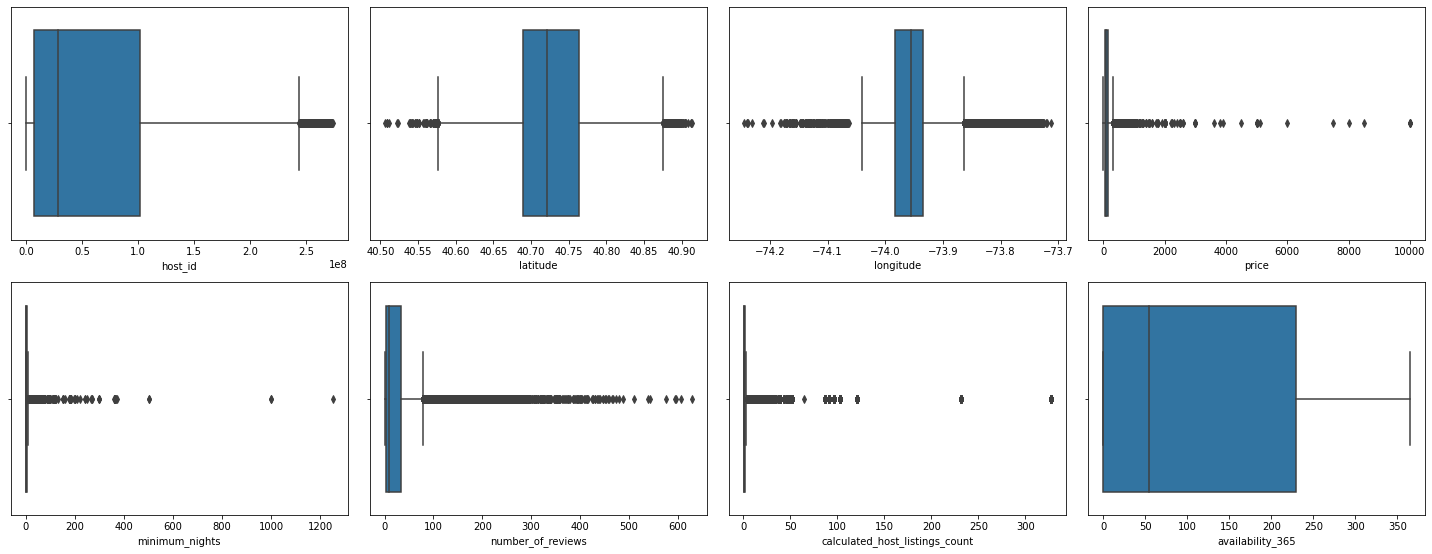

In [17]:
# check outliers in numerical columns with seaborn boxplot
columns = ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

####lets use IQR method for removing outliers

#####[[1]].remove outliers for {{{{price}}}} column

count    38837.000000
mean       142.314442
std        196.959053
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


(38837, 13)

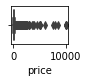

In [18]:
#boxplot of {{price}} column before removing outliers 
print(df["price"].describe())
plt.subplot(5,5,n)
sns.boxplot(x=df['price'])
df.shape

In [19]:
#lets find IQR for price columns
first_quantile=df['price'].quantile(.25)
third_quantile=df['price'].quantile(.75)
IQR = third_quantile - first_quantile

In [20]:
#set the new boundary for price columns without outliers
new_boundary = third_quantile + 3*IQR

In [21]:
#removing outliers,i.e.,values greater than set new boundary for price column
df.drop(df[df['price']>new_boundary].index,axis=0,inplace = True)

(37977, 13)

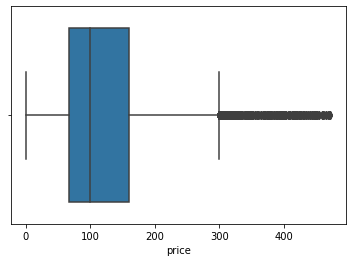

In [22]:
#boxplot for ----price columns--- after removing outliers
sns.boxplot(x=df['price'])
df.shape

######[[2]].remove outliers for{{ {minimum_nights }}}column

count    37977.000000
mean         5.863338
std         17.427149
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64


(37977, 13)

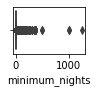

In [23]:
#boxplot of {{minimun_nights}} column before removing outliers 
print(df["minimum_nights"].describe())
plt.subplot(4,4,n)
sns.boxplot(x=df['minimum_nights'])
df.shape

In [24]:
#find IQR for minimum_nights columns
first_quantile=df['minimum_nights'].quantile(.25)
third_quantile=df['minimum_nights'].quantile(.75)
IQR = third_quantile - first_quantile

In [25]:
#set new boundary for minimum_nights column
new_boundary = third_quantile + 3*IQR

In [26]:
#removing outliers,i.e.,values greater than our new boundary in minimum_nights column
df.drop(df[df['minimum_nights']>new_boundary].index,axis=0,inplace = True)

In [27]:
#lets check the shape of minimum_nights column after removing outliers
df.shape

(34135, 13)

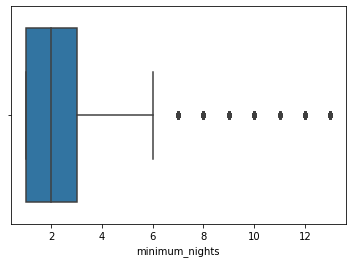

In [28]:
#boxplot for minimum_nights columns after removing outliers
sns.boxplot(x=df['minimum_nights'])

######[[3]].remove outliers for{{ {number_of_reviews}}}column

count    34135.000000
mean        31.350286
std         49.980540
min          1.000000
25%          3.000000
50%         11.000000
75%         37.000000
max        629.000000
Name: number_of_reviews, dtype: float64


(34135, 13)

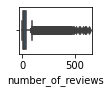

In [29]:
#boxplot of {{number_of_reviews}} column before removing outliers 
print(df["number_of_reviews"].describe())
plt.subplot(4,4,n)
sns.boxplot(x=df['number_of_reviews'])
df.shape

In [30]:
#lets find out the IQR for number_of_reviews column
first_quantile=df['number_of_reviews'].quantile(.25)
third_quantile=df['number_of_reviews'].quantile(.75)
IQR = third_quantile - first_quantile

In [31]:
#set the new boundary for this column
new_boundary = third_quantile + 3*IQR

In [32]:
#removing of outliers in number_of_reviews column
df.drop(df[df['number_of_reviews']>new_boundary].index,axis=0,inplace = True)

In [33]:
#check the shape of this column after removing the outliers
df.shape

(32569, 13)

(32569, 13)

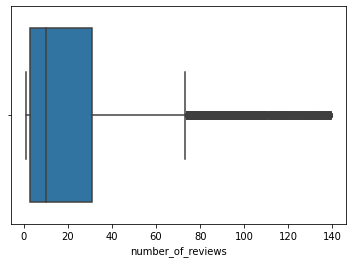

In [34]:
#boxplot for number_of_reviews columns after removing outliers
sns.boxplot(x=df['number_of_reviews'])
df.shape

######[[4]].remove outliers for{{ {calculated_host_listings_count}}}column

count    32569.000000
mean         3.677515
std         23.945725
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


(32569, 13)

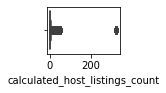

In [35]:
#boxplot of {{calculated_host_listings_count}} column before removing outliers 
print(df["calculated_host_listings_count"].describe())
plt.subplot(4,4,n)
sns.boxplot(x=df['calculated_host_listings_count'])
df.shape

In [36]:
#calculate IQR for column---calculated_host_listings_count
first_quantile=df['calculated_host_listings_count'].quantile(.25)
third_quantile=df['calculated_host_listings_count'].quantile(.75)
IQR = third_quantile - first_quantile

In [37]:
#set the new boundary for column ---calculated_host_listings_count
new_boundary = third_quantile + 3*IQR

In [38]:
#remove outliers 
df.drop(df[df['calculated_host_listings_count']>new_boundary].index,axis=0,inplace = True)

(30890, 13)

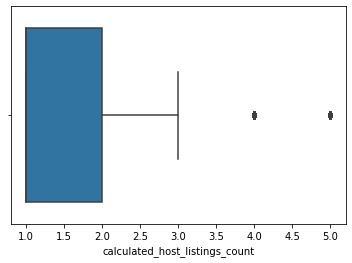

In [39]:
#boxplot after removing outliers of column ----calculated_host_listings_count
sns.boxplot(x=df['calculated_host_listings_count'])
df.shape

######[[5]].remove outliers for{{ {availability_365 }}}column

count    30890.000000
mean        94.147912
std        121.131929
min          0.000000
25%          0.000000
50%         26.000000
75%        173.000000
max        365.000000
Name: availability_365, dtype: float64


(30890, 13)

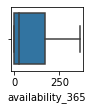

In [40]:
#boxplot of {{availabilty_365}} column before removing outliers 
print(df["availability_365"].describe())
plt.subplot(3,4,n)
sns.boxplot(x=df['availability_365'])
df.shape

In [41]:
#calculate IQR for column--availability_360
first_quantile=df['availability_365'].quantile(.25)
third_quantile=df['availability_365'].quantile(.75)
IQR = third_quantile - first_quantile

In [42]:
#set new boundary 
new_boundary = third_quantile + 3*IQR

In [43]:
#remove outliers 
df.drop(df[df['availability_365']>new_boundary].index,axis=0,inplace = True)

(30890, 13)

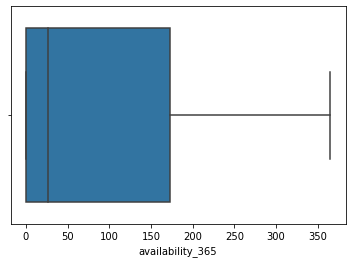

In [44]:
#boxplot for column--availability_365 after removing outliers
sns.boxplot(x=df['availability_365'])
df.shape

####[[6]].remove outliers for {{latitude}} column

count    30890.000000
mean        40.727630
std          0.056168
min         40.506410
25%         40.687962
50%         40.720080
75%         40.763427
max         40.913060
Name: latitude, dtype: float64


(30890, 13)

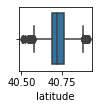

In [45]:
#boxplot of {{latitude}} column before removing outliers 
print(df["latitude"].describe())
plt.subplot(3,4,n)
sns.boxplot(x=df['latitude'])
df.shape

In [46]:
#find IQR for latitude columns
first_quantile=df['latitude'].quantile(.25)
third_quantile=df['latitude'].quantile(.75)
IQR = third_quantile - first_quantile

In [47]:
#set the new boundary
new_boundary = third_quantile + 3*IQR

In [48]:
#removing outliers 
df.drop(df[df['latitude']>new_boundary].index,axis=0,inplace = True)

(30890, 13)

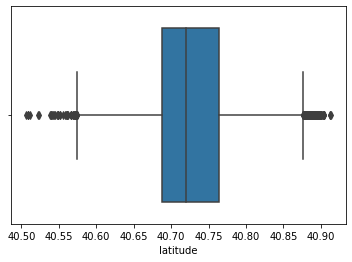

In [49]:
#boxplot after removing outliers in latitude column
sns.boxplot(x=df['latitude'])
df.shape

#####[[7]].remove outliers for {{review_per_month}} column

count    30890.000000
mean         1.316673
std          1.567515
min          0.010000
25%          0.190000
50%          0.710000
75%          1.980000
max         20.940000
Name: reviews_per_month, dtype: float64


(30890, 13)

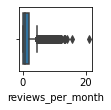

In [50]:
#boxplot of {{reviews_per_month}} column before removing outliers 
print(df["reviews_per_month"].describe())
plt.subplot(3,4,n)
sns.boxplot(x=df['reviews_per_month'])
df.shape

In [51]:
#find IQR
first_quantile=df['reviews_per_month'].quantile(.25)
third_quantile=df['reviews_per_month'].quantile(.75)
IQR = third_quantile - first_quantile

In [52]:
#set new boundary
new_boundary = third_quantile + 3*IQR

In [53]:
#remove outliers
df.drop(df[df['reviews_per_month']>new_boundary].index,axis=0,inplace = True)

(30655, 13)

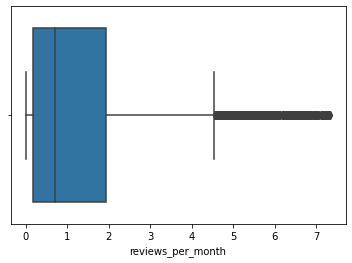

In [54]:
#boxplot after removing outliers in latitude column
sns.boxplot(x=df['reviews_per_month'])
df.shape

##Now our data is clean.lets explore data and visualizing

In [55]:
#number of different neighbourhood group
#df.neighbourhood_group.value_counts()
df_counts=df["neighbourhood_group"].value_counts()
df_counts

Brooklyn         13495
Manhattan        12544
Queens            3608
Bronx              759
Staten Island      249
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



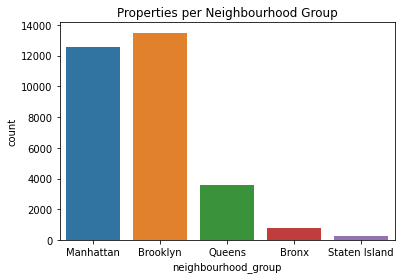

In [56]:
#properties of neighbourhood_group by bar
title='Properties per Neighbourhood Group'
sns.countplot(df['neighbourhood_group'])
plt.title(title)
plt.ioff()

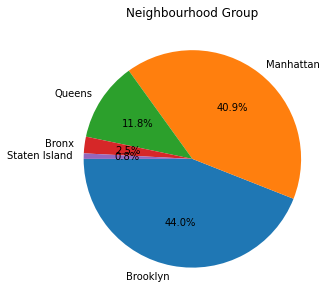

In [57]:
#properties of neighbourhood_group by pie chart
plt.figure(figsize=(7,5))
plt.title("Neighbourhood Group")
g=plt.pie(df.neighbourhood_group.value_counts(),labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

Most properties are located in Brooklyn and Manhattan

In [58]:
#average price of Airbnb in differentneighbourhood group
neighbourhood_group_avgPrice = df.groupby("neighbourhood_group").agg({"price":"mean"}).reset_index()
neighbourhood_group_avgPrice.rename(columns={'price':'avgPrice'},inplace=True)
neighbourhood_group_avgPrice

,neighbourhood_group,avgPrice
0,Bronx,79.191041
1,Brooklyn,113.596369
2,Manhattan,153.849888
3,Queens,93.803769
4,Staten Island,95.397590
